# Homework 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('seaborn')

In [3]:
student_performance = pd.read_csv("StudentsPerformance.csv")

student_performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
student_performance.columns = [x.replace(" ", "_") for x in student_performance.columns]

student_performance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
scores = student_performance.filter(like = "score")

scores

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# Checking normalization of data
### Z-standartization

In [6]:
math_score_z = stats.zscore(scores.math_score.values)
writing_score_z = stats.zscore(scores.writing_score.values)
reading_score_z = stats.zscore(scores.reading_score.values)

### Shapiro test

In [7]:
print("Results of Shapiro test and p-value for math score:", stats.shapiro(scores["math_score"]))
print("Results of Shapiro test and p-value for reading score:", stats.shapiro(scores["reading_score"]))
print("Results of Shapiro test and p-value for writing score:", stats.shapiro(scores["writing_score"]))

Results of Shapiro test and p-value for math score: (0.9931508302688599, 0.0001453401637263596)
Results of Shapiro test and p-value for reading score: (0.9929210543632507, 0.0001056220498867333)
Results of Shapiro test and p-value for writing score: (0.9919633269309998, 2.9172901122365147e-05)


### Probability plots

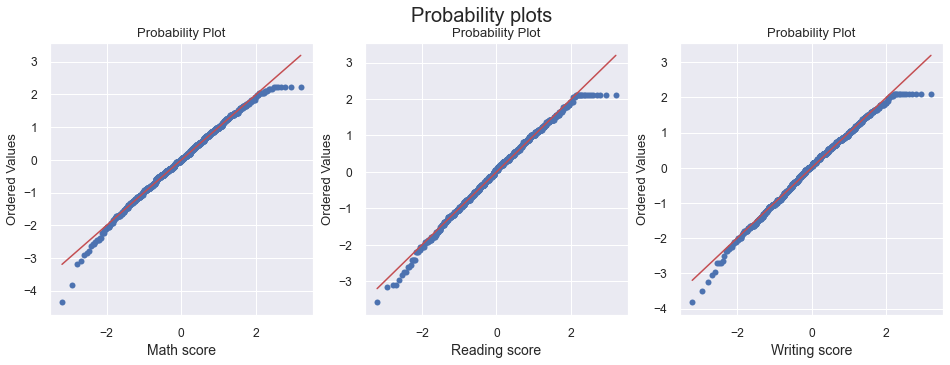

In [8]:
plt.figure(figsize = (16, 5))

plt.suptitle("Probability plots", fontsize = 20)

sns.set(font_scale = 1.1)

plt.subplot(131)
stats.probplot(math_score_z, dist = "norm", plot = plt)
plt.xlabel("Math score", fontsize = 14)

plt.subplot(132)
stats.probplot(reading_score_z, dist = "norm", plot = plt)
plt.xlabel("Reading score", fontsize = 14)

plt.subplot(133)
stats.probplot(writing_score_z, dist = "norm", plot = plt)
plt.xlabel("Writing score", fontsize = 14)

plt.show()

### Distribution plots for scores

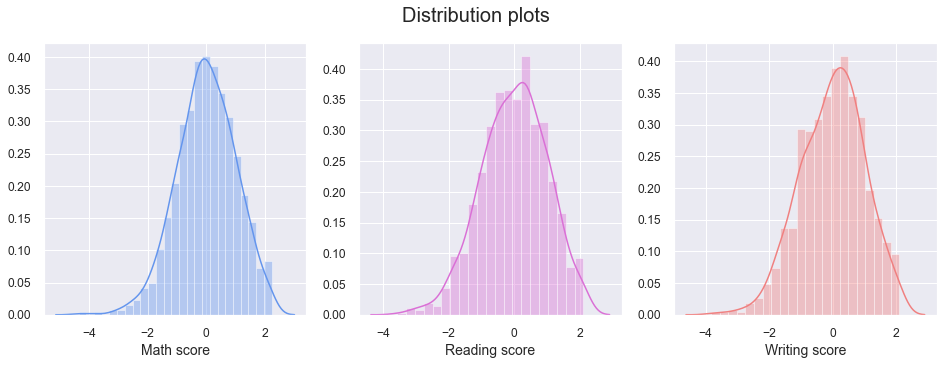

In [9]:
plt.figure(figsize = (16, 5))

plt.suptitle("Distribution plots", fontsize = 20)

sns.set(font_scale = 1.1)

plt.subplot(131)
sns.distplot(math_score_z, color = "cornflowerblue")
plt.xlabel("Math score", fontsize = 14)

plt.subplot(132)
sns.distplot(reading_score_z, color = "orchid")
plt.xlabel("Reading score", fontsize = 14)

plt.subplot(133)
sns.distplot(writing_score_z, color = "lightcoral")
plt.xlabel("Writing score", fontsize = 14)

plt.show()

# Type of dependencies

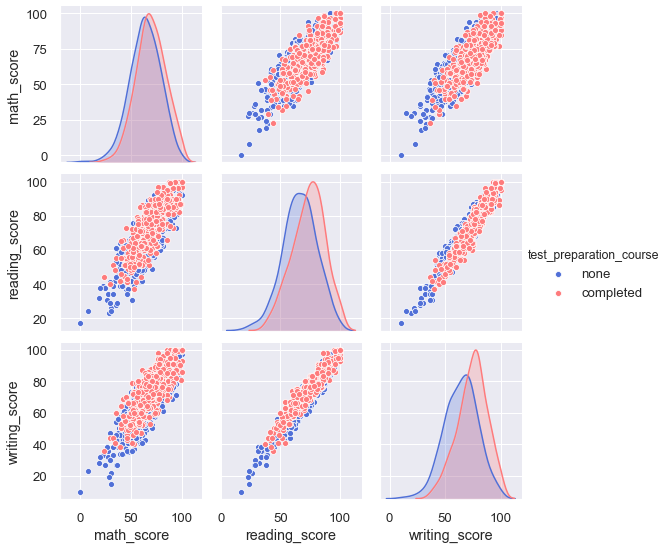

In [10]:
colors = ["cornflower blue", "salmon pink"]

sns.set(font_scale = 1.2)

dep_type = sns.pairplot(student_performance, 
                        hue = "test_preparation_course", 
                        palette = sns.xkcd_palette(colors),
                        vars = ["math_score", "reading_score", "writing_score"])

plt.show()

# Pearson & Spearman correlation

In [11]:
pearson = scores.corr()

pearson

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [12]:
spearman = scores.corr(method = "spearman")

spearman

,math_score,reading_score,writing_score
math_score,1.000000,0.804064,0.778339
reading_score,0.804064,1.000000,0.948953
writing_score,0.778339,0.948953,1.000000


Correlation is clearly positive, as the values are rather close to 1. So, now I will visualis it using heatmaps
### Visualisation

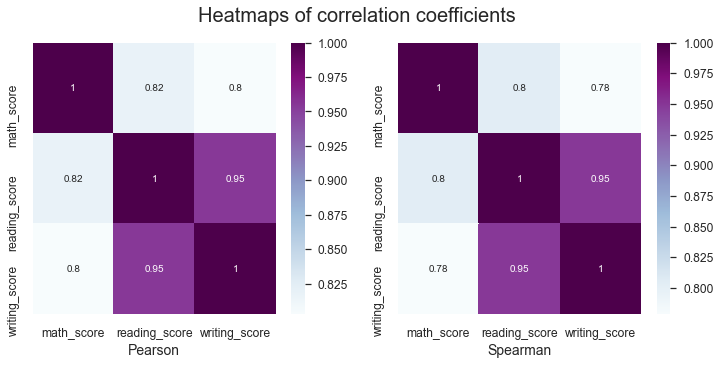

In [13]:
plt.figure(figsize = (12, 5))

plt.suptitle("Heatmaps of correlation coefficients", fontsize = 20)

sns.set(font_scale = 1.1)

plt.subplot(121)
sns.heatmap(pearson, cmap = "BuPu", annot = True, annot_kws = {"size": 10})
plt.xlabel("Pearson", fontsize = 14)

plt.subplot(122)
sns.heatmap(spearman, cmap = "BuPu", annot = True, annot_kws = {"size": 10})
plt.xlabel("Spearman", fontsize = 14)

plt.show()

The results are close, heatmaps look rather the same and numbers are very close to each other
# Linear regression
### Predicting Math score with Reading score

R^2 score: 0.6684365064501091


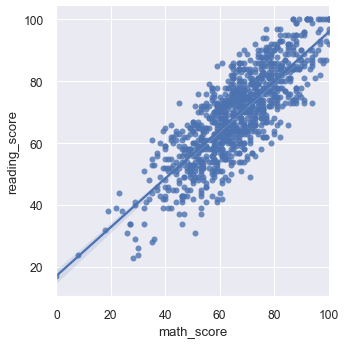

In [14]:
x = student_performance["math_score"].values.reshape(-1, 1)
y = student_performance["reading_score"].values.reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(x, y)

print("R^2 score:", linear_regression.score(x, y))

sns.lmplot(x = "math_score", y = "reading_score", palette = "cornflowerblue", data = student_performance)
plt.show()

### Predicting Reading score with Writing score

R^2 score: 0.9112574888913137


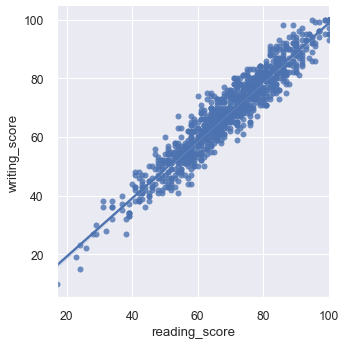

In [15]:
x = student_performance["reading_score"].values.reshape(-1, 1)
y = student_performance["writing_score"].values.reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(x, y)

print("R^2 score:", linear_regression.score(x, y))

sns.lmplot(x = "reading_score", y = "writing_score", palette = "cornflowerblue", data = student_performance)

plt.show()

### Predicting Math score with Writing score

R^2 score: 0.6442342539264934


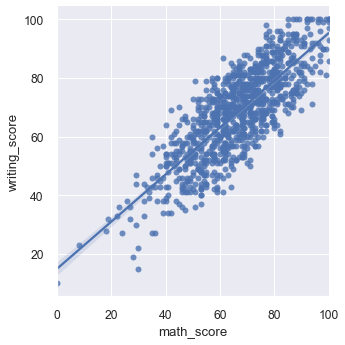

In [16]:
x = student_performance["math_score"].values.reshape(-1, 1)
y = student_performance["writing_score"].values.reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(x, y)

print("R^2 score:", linear_regression.score(x, y))

sns.lmplot(x = "math_score", y = "writing_score", palette = "cornflowerblue", data = student_performance)

plt.show()

# Influence of student's race or/and parents level of education on lunch type
### Race and lunch

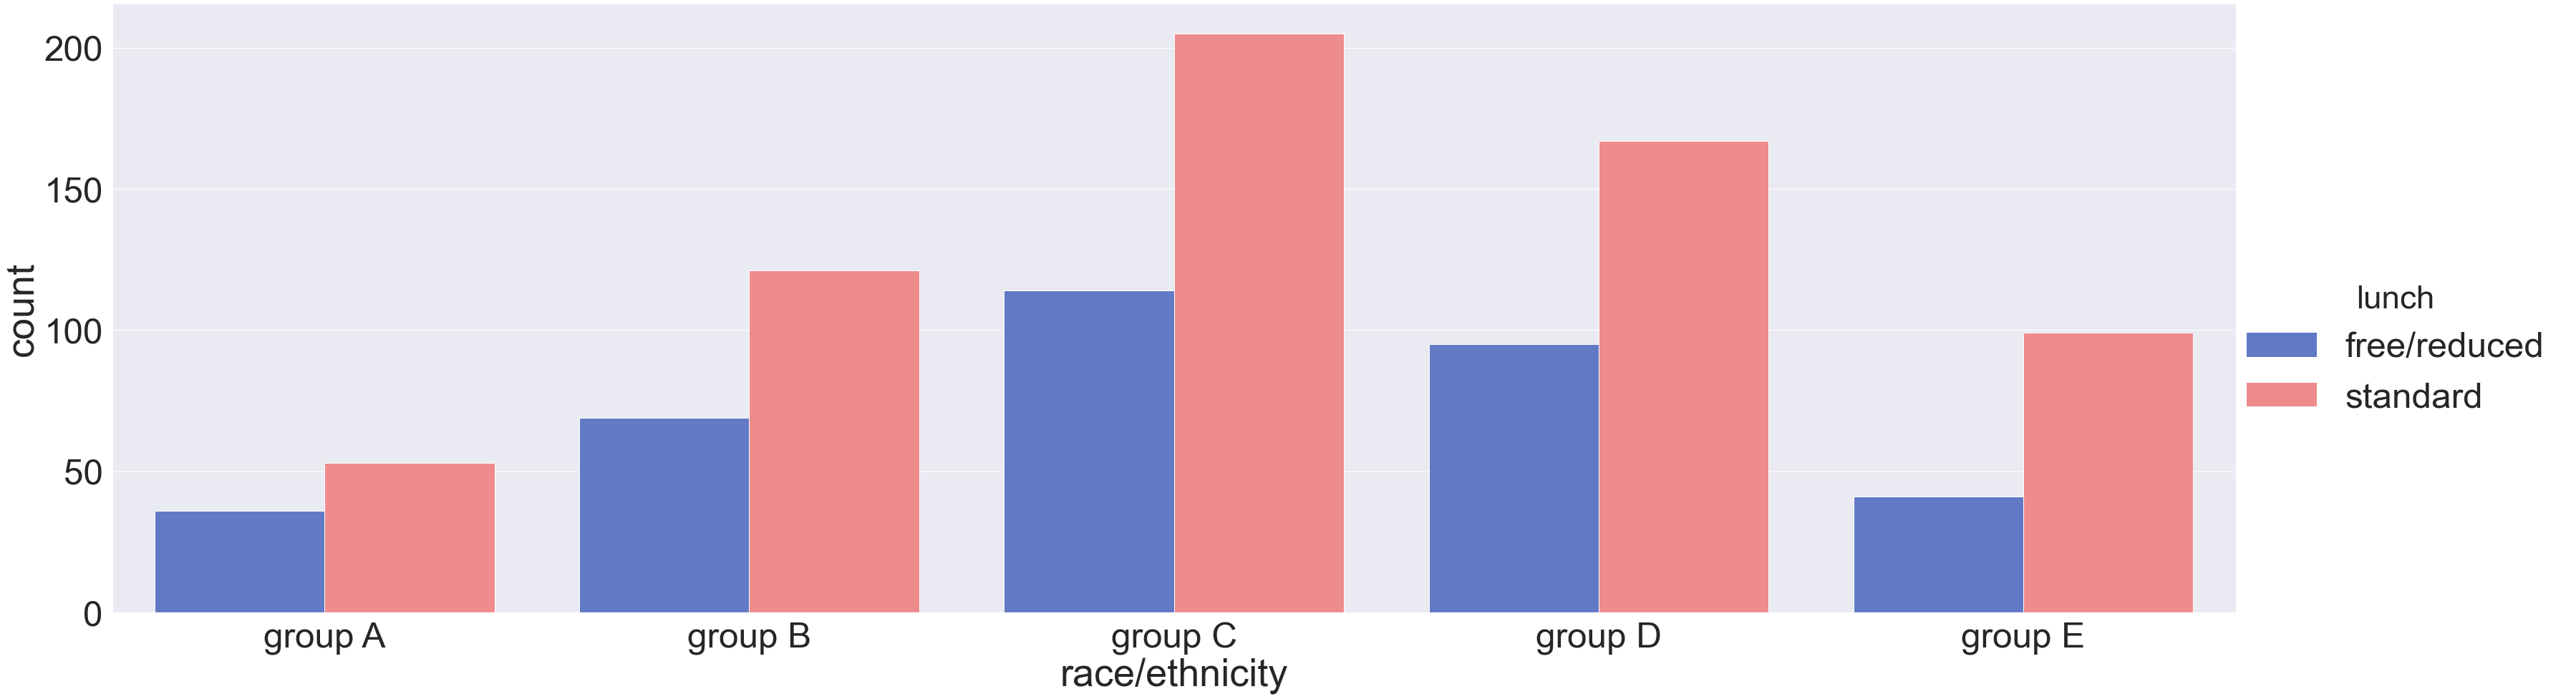

In [17]:
race_lunch = student_performance.groupby(["lunch", "race/ethnicity"]).aggregate({"gender": "count"})
race_lunch = race_lunch.rename(columns = {"gender":'count'}).reset_index()

race = race_lunch.pivot(columns = "lunch", values = "count", index = "race/ethnicity")

sns.set(font_scale = 4.5)
colors = ["cornflower blue", "salmon pink"]

sns.catplot(data = race_lunch, x = "race/ethnicity", y = "count", 
            hue = "lunch", kind = "bar", height = 15, aspect = 3, 
            palette = sns.xkcd_palette(colors))

In [18]:
chi2, p_race, dof, exp = stats.chi2_contingency(race)
p_race

0.48669808284196503

### Parents' education and lunch

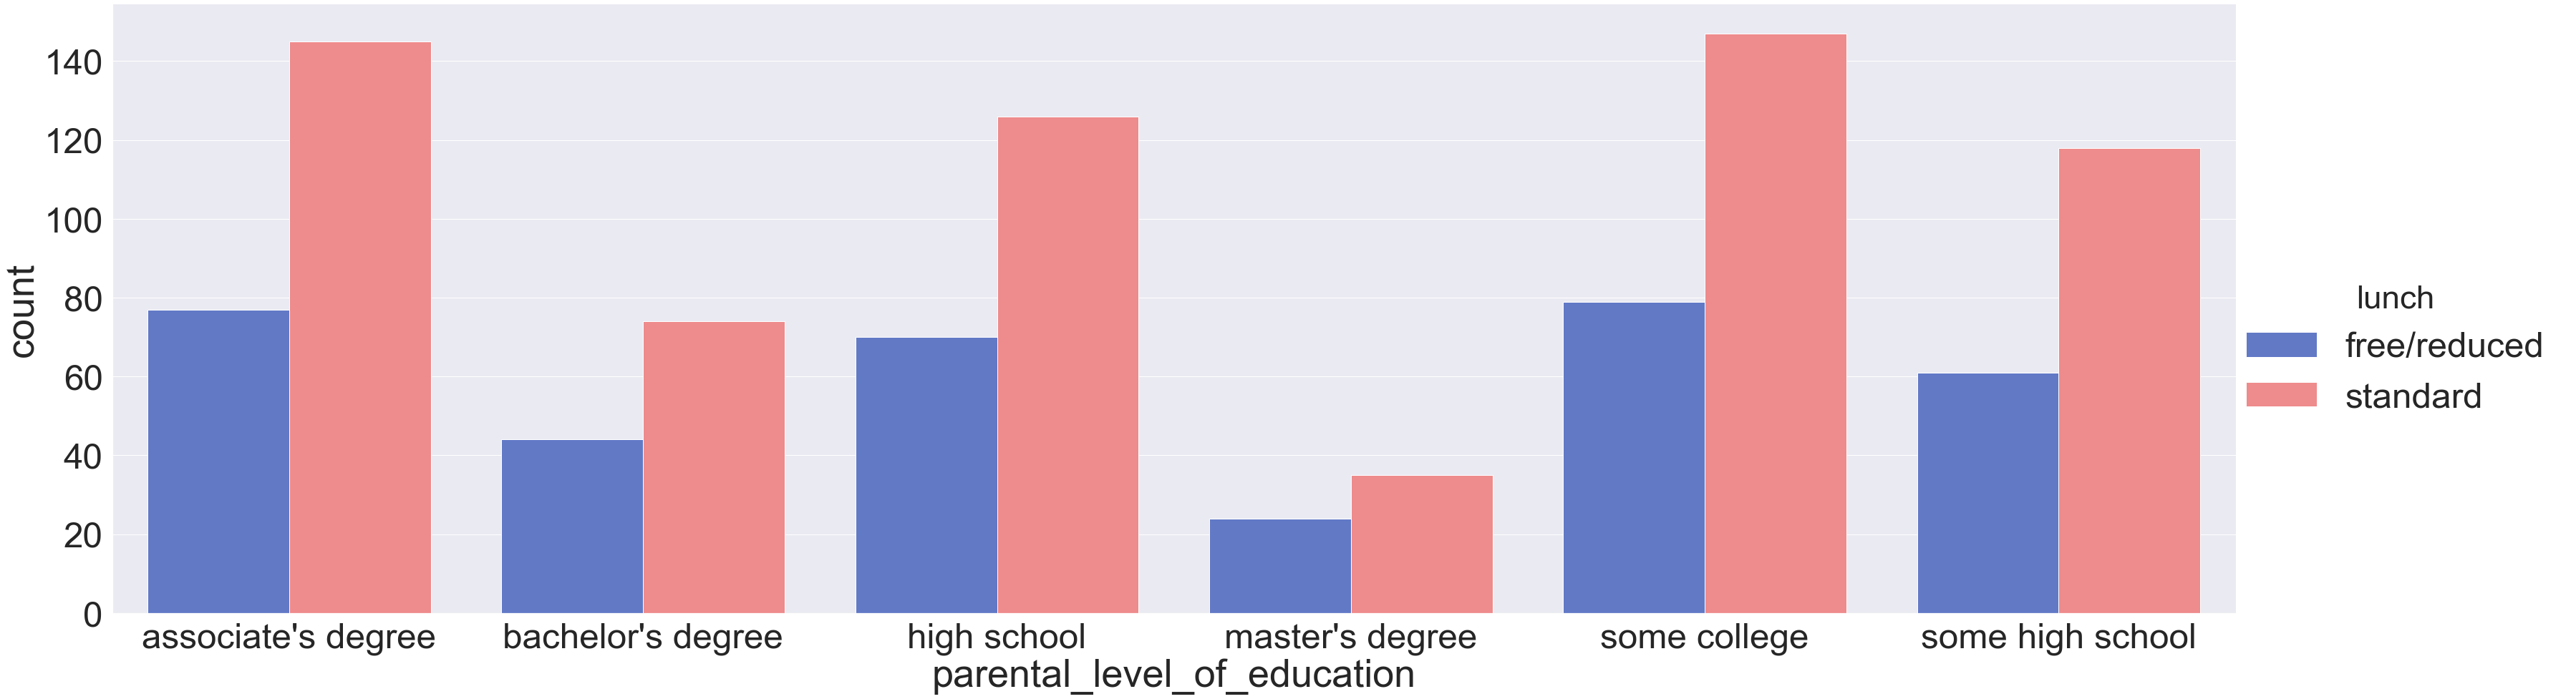

In [19]:
education_lunch = student_performance.groupby(["lunch", "parental_level_of_education"]).aggregate({"gender": "count"})
education_lunch = education_lunch.rename(columns = {"gender":'count'}).reset_index()

parents = education_lunch.pivot(columns = "lunch", values = "count", index = "parental_level_of_education")

sns.set(font_scale = 4.5)
colors = ["cornflower blue", "salmon pink"]

sns.catplot(data = education_lunch, x = "parental_level_of_education", y = "count", 
            hue = "lunch", kind = "bar", height = 15, aspect = 3, 
            palette = sns.xkcd_palette(colors))

In [20]:
chi2, p_parents, dof, exp = stats.chi2_contingency(parents)
p_parents

0.9531014927218224